<a href="https://colab.research.google.com/github/shr968/marvel/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

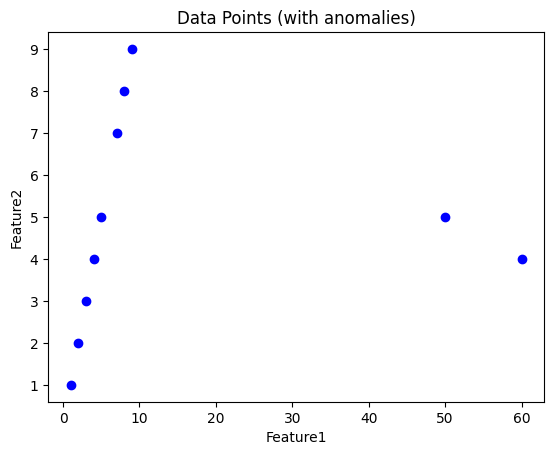

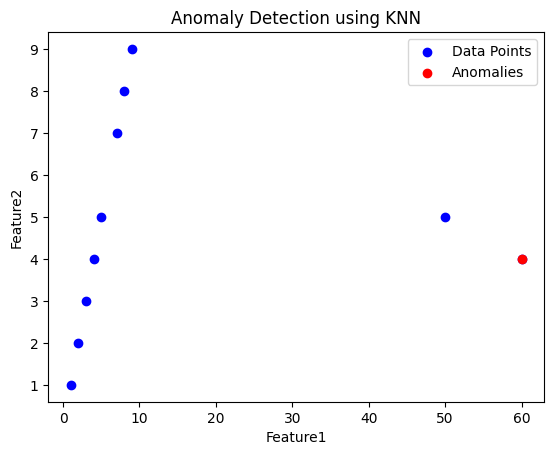

Anomalies Detected:
   Feature1  Feature2  Anomaly
6        60         4     True


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5, 50, 60, 7, 8, 9],
    'Feature2': [1, 2, 3, 4, 5, 5, 4, 7, 8, 9]
}

df = pd.DataFrame(data)

plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Data Points')
plt.title("Data Points (with anomalies)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

knn = NearestNeighbors(n_neighbors=3)
knn.fit(df)

distances, indices = knn.kneighbors(df)

distance_to_nearest_neighbors = distances[:, -1]

threshold = np.percentile(distance_to_nearest_neighbors, 90)

df['Anomaly'] = distance_to_nearest_neighbors > threshold

plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Data Points')

plt.scatter(df[df['Anomaly'] == True]['Feature1'],
            df[df['Anomaly'] == True]['Feature2'],
            color='red', label='Anomalies')

plt.title("Anomaly Detection using KNN")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

print("Anomalies Detected:")
print(df[df['Anomaly'] == True])
